In [1]:
from constants import *
from obfuscation import *
from run_obfuscation import * 
from data_utils import *
from stereo_utils import *
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import pickle
from pathlib import Path

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [6]:
dataset_files = list(read_dataset_to_obfuscate(f"{ROOT_DIR}/obfuscation/ml-1m"))
original_data = { data_slice:transform_to_obf(data) for data_slice,data in zip(['train','valid','test'],dataset_files)}


In [37]:
data_dir = f"{ROOT_DIR}/obfuscation/ml-1m"
def calculate_dataset_stereo(data_dir,stereo_types=["mean","median"]):
    train_data, valid_data, test_data, inclination_data, user_features, dataset_name  = read_dataset_to_obfuscate(data_dir)
    for stereo_type in stereo_types:
        user_stereo_scores = []
        for user  in user_features["userID"].values:        
            user_data, valid_user_items, user_ff_values, user_stereo_score = prepare_user_to_obf(ff_data=inclination_data,sterotyp_method=stereo_type,train_data=train_data,user=user)
            user_stereo_scores.append(user_stereo_score)
        user_features[f"stereo_{stereo_type}"] = user_stereo_scores
    return user_features
def read_dataset_stereo(data_dir):
    dataset_name = data_dir.split("/")[-1]
    return pd.read_csv(f"{data_dir}/{dataset_name}_user_ster.csv",index_col="userID")

In [38]:
obf_dir = f"{ROOT_DIR}/obfuscation"
data_dirs = !ls {ROOT_DIR}/ob*
dataset = "ml-1m-1000_"
data_dict = {url:f"{obf_dir}/{url}" for url in data_dirs if url.startswith(dataset)} 

In [44]:
obf_dict_datasets={}
original_ster_data = read_dataset_stereo(f"{obf_dir}/ml-1m-1000")
for dset,url in data_dict.items():
    print(f"Proessing: {dset}")
    obf_dict_datasets[dset]=read_dataset_stereo(url)
    obf_dict_datasets[dset][dset]=obf_dict_datasets[dset]
    obf_dict_datasets[dset]=obf_dict_datasets[dset][dset]


Proessing: ml-1m-1000_remove_0.05_ff_inc_ratio_th0.005
Proessing: ml-1m-1000_remove_0.05_ff_mean_th0.005
Proessing: ml-1m-1000_remove_0.05_ff_median_th0.005
Proessing: ml-1m-1000_remove_0.15_ff_inc_ratio_th0.005
Proessing: ml-1m-1000_remove_0.15_ff_mean_th0.005
Proessing: ml-1m-1000_remove_0.15_ff_median_th0.005
Proessing: ml-1m-1000_remove_0.1_ff_inc_ratio_th0.005
Proessing: ml-1m-1000_remove_0.1_ff_mean_th0.005
Proessing: ml-1m-1000_remove_0.1_ff_median_th0.005


In [67]:
list_data =list(obf_dict_datasets.values())
list_data.append(original_ster_data["median"])
perturbated_datasets = pd.concat(list_data,axis=1)


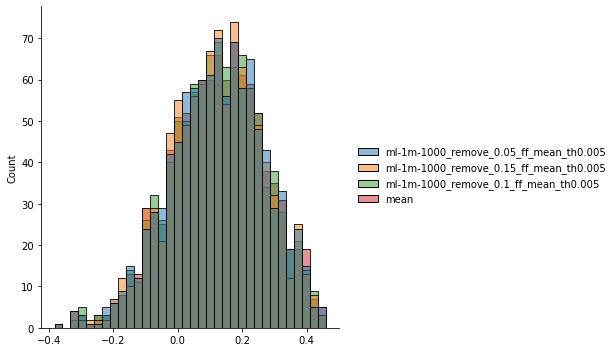

In [60]:
sns.displot(perturbated_datasets[[c for c in perturbated_datasets.columns if "mean" in c ]])

<AxesSubplot:xlabel='userID'>

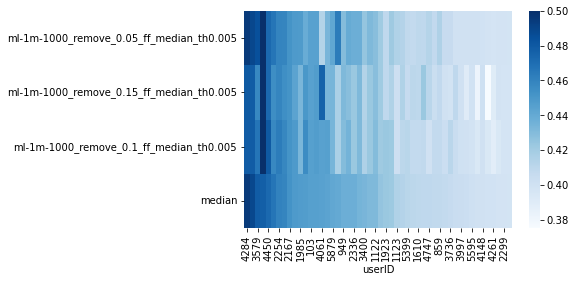

In [80]:
data_plot = perturbated_datasets[[c for c in perturbated_datasets.columns if "median" in c ]].sort_values("median",ascending=False)
sns.heatmap(data_plot[:50].T,cmap="Blues")